<a href="https://colab.research.google.com/github/MathewLipman/Work-Samples/blob/main/Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

In [ ]:
wnba = pd.read_csv('/content/drive/MyDrive/Dataset/wnba.csv')

In [ ]:
wnba.shape

(143, 32)

In [ ]:
pd.set_option('display.max_colwidth', 200)

In [ ]:
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


In [ ]:
wnba.columns

Index(['Name', 'Team', 'Pos', 'Height', 'Weight', 'BMI', 'Birth_Place',
       'Birthdate', 'Age', 'College', 'Experience', 'Games Played', 'MIN',
       'FGM', 'FGA', 'FG%', '15:00', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PTS', 'DD2', 'TD3'],
      dtype='object')

In [ ]:
wnba[wnba['College'] == 'Duke']


,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
33,Chelsea Gray,LA,G,180,77.0,23.765432,US,"August 10, 1992",25,Duke,...,19,80,99,132,29,7,61,456,1,0
47,Elizabeth Williams,ATL,F/C,191,87.0,23.848030,US,"June 23, 1993",24,Duke,...,35,61,96,5,5,4,21,128,0,0
61,Jasmine Thomas,CON,G,175,66.0,21.551020,US,"September 30, 1989",27,Duke,...,9,55,64,118,45,4,58,391,1,0
73,Karima Christmas-Kelly,DAL,G/F,183,82.0,24.485652,US,"November 9, 1989",27,Duke,...,4,10,14,6,1,1,13,65,0,0
83,Krystal Thomas,WAS,C,196,88.0,22.907122,US,"October 6, 1989",27,Duke,...,97,172,269,30,15,31,45,199,2,0
95,Monique Currie,PHO,G/F,183,80.0,23.888441,US,"February 25, 1983",34,Duke,...,19,103,122,67,22,11,48,364,0,0


In [ ]:
wnba.duplicated().sum()

0

In [ ]:
wnba['Name'].duplicated().sum()

0

Random state = 1 means that the numbers generated by this code will remain consistent - after it produces our random sample it will keep producing the same numbers so the codes results are reproducable and this can help us in our sampling / testing / work greatly in other ways.

In [ ]:
# print(wnba.head())
# print(wnba.tail())
# wnba.shape
print(wnba['Games Played'].describe())
parameter = max(wnba['Games Played'])
sample = wnba['Games Played'].sample(30, random_state = 1)
statistic = max(sample)
sampling_error = parameter - statistic

count    143.000000
mean      24.356643
std        7.104259
min        2.000000
25%       22.000000
50%       27.000000
75%       29.000000
max       32.000000
Name: Games Played, dtype: float64


bootstrapping / central limit theroem:

The idea behind this code is to perform a simple simulation of the Central Limit Theorem, which states that the distribution of sample means will approximate a normal distribution, given a sufficiently large number of samples, regardless of the shape of the population distribution. By generating a large number of sample means and plotting them, one can observe this principle in action. The resulting plot is often called a sampling distribution of the mean. This technique is useful in inferential statistics when trying to estimate population parameters based on samples.

In [ ]:
sample_means = []
population_mean = wnba['PTS'].mean(numeric_only=True)

for i in range(100):
    sample = wnba['PTS'].sample(10, random_state=i)
    sample_means.append(sample.mean(numeric_only=True))

In [ ]:
np.mean(sample_means)

187.805

In [ ]:
np.mean(population_mean)

201.7902097902098

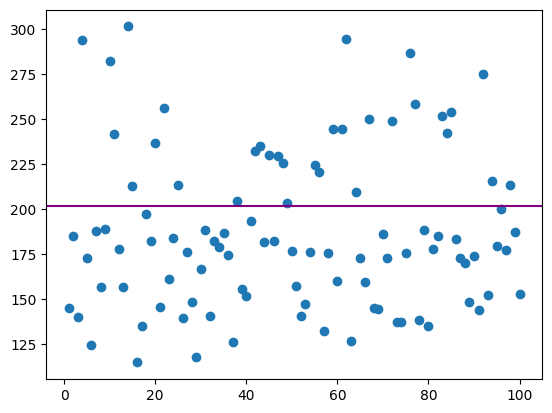

In [ ]:
plt.scatter(range(1,101), sample_means)
plt.axhline(population_mean, color='purple')
plt.show()

In [ ]:
wnba.columns

Index(['Name', 'Team', 'Pos', 'Height', 'Weight', 'BMI', 'Birth_Place',
       'Birthdate', 'Age', 'College', 'Experience', 'Games Played', 'MIN',
       'FGM', 'FGA', 'FG%', '15:00', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PTS', 'DD2', 'TD3'],
      dtype='object')

In [ ]:
wnba['Pts_per_game'] = wnba['PTS'] / wnba['Games Played']

In [ ]:
wnba['Pts_per_game'].mean(numeric_only=True)

7.704285467170314

In [ ]:
gpoints = wnba.loc[wnba['Pos'] == 'G', 'Pts_per_game']


In [ ]:
print(gpoints.sort_values(ascending=False).head())

45     18.800000
124    18.166667
67     17.233333
7      17.000000
138    16.103448
Name: Pts_per_game, dtype: float64


In [ ]:
gpoints.mean(numeric_only=True)

8.183390625861266

In [ ]:
positions = ['G', 'F', 'C', 'G/F', 'F/C']
posp = {}

grouped = wnba.groupby('Pos')

for p in positions:
    if p in grouped.groups:  # check if the position exists in the groups
        df_position = grouped.get_group(p)
        stats = df_position['Pts_per_game'].describe()
        posp[p] = stats

# posp is a dictionary where each key is a position and the corresponding value 
# is a Series with statistics for 'Pts_per_game' for that position.

# For example, to access the stats for the position 'G', you can do:
print(posp['C'])


count    25.000000
mean      6.506023
std       5.614580
min       0.333333
25%       2.076923
50%       5.300000
75%       8.466667
max      20.954545
Name: Pts_per_game, dtype: float64


In [ ]:
postteam = wnba.groupby(['Pos', 'Team'])
postteam.size()

Pos  Team
C    ATL     2
     CHI     1
     CON     1
     DAL     2
     IND     2
     LA      2
     MIN     2
     NY      3
     PHO     2
     SAN     4
     SEA     2
     WAS     2
F    ATL     1
     CHI     6
     CON     4
     DAL     5
     IND     3
     LA      2
     MIN     3
     PHO     2
     SAN     2
     SEA     3
     WAS     2
F/C  ATL     2
     CON     2
     LA      2
     MIN     1
     NY      2
     PHO     1
     SEA     2
G    ATL     5
     CHI     4
     CON     4
     DAL     4
     IND     6
     LA      4
     MIN     4
     NY      6
     PHO     6
     SAN     5
     SEA     5
     WAS     7
G/F  ATL     1
     CHI     1
     CON     1
     DAL     1
     IND     1
     LA      2
     MIN     1
     NY      1
     PHO     1
     SAN     2
     WAS     1
dtype: int64

In [ ]:
postteamppg = wnba.groupby(['Pos', 'Team'])['Pts_per_game'].mean(numeric_only=True)
print(postteamppg.head())

Pos  Team
C    ATL      6.422989
     CHI     14.214286
     CON      5.950000
     DAL      2.479167
     IND      4.050000
Name: Pts_per_game, dtype: float64


In [ ]:

# Stratifying the data in five strata
stratum_G = wnba[wnba.Pos == 'G']
stratum_F = wnba[wnba.Pos == 'F']
stratum_C = wnba[wnba.Pos == 'C']
stratum_GF = wnba[wnba.Pos == 'G/F']
stratum_FC = wnba[wnba.Pos == 'F/C']


In [ ]:
points_per_position = {}
for stratum, position in [(stratum_G, 'G'), (stratum_F, 'F'), (stratum_C, 'C'),
                (stratum_GF, 'G/F'), (stratum_FC, 'F/C')]:
    
    sample = stratum['Pts_per_game'].sample(10, random_state = 0) # simple random sampling on each stratum
    points_per_position[position] = sample.mean(numeric_only=True)
    
position_most_points = max(points_per_position, key = points_per_position.get)

In [ ]:
print(points_per_position)

{'G': 7.092926195632343, 'F': 8.702175158545568, 'C': 9.833761394334251, 'G/F': 6.817264935760487, 'F/C': 9.059118773946361}


In [ ]:
print(position_most_points)

C


In [ ]:
pd.DataFrame.from_dict(points_per_position, orient='index')

,0
G,7.092926
F,8.702175
C,9.833761
G/F,6.817265
F/C,9.059119


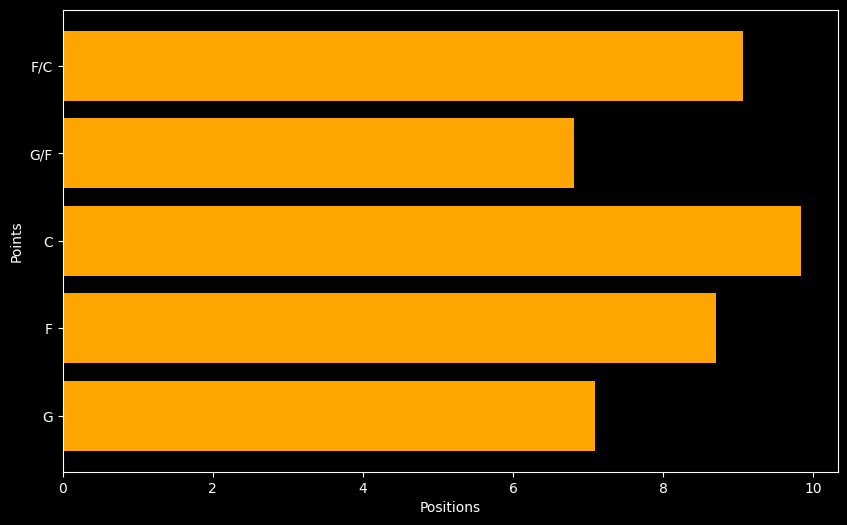

In [ ]:
style.use('dark_background')
# Separate keys and values
positions = list(points_per_position.keys())
points = list(points_per_position.values())

# Create bar plot
plt.figure(figsize=(10,6))
plt.barh(positions, points, color='orange')

plt.xlabel('Positions')
plt.ylabel('Points')

# Display plot
plt.show()


the output is in intervals, bin = n, splits our sample n times. 

In [ ]:
print(wnba['Games Played'].value_counts(bins = 3, normalize = True) * 100)

(22.0, 32.0]     72.727273
(12.0, 22.0]     18.181818
(1.969, 12.0]     9.090909
Name: Games Played, dtype: float64


In [ ]:
under_12 = wnba[wnba['Games Played'] <= 12]
btw_13_22 = wnba[(wnba['Games Played'] > 12) & (wnba['Games Played'] <= 22)]
over_22 = wnba[wnba['Games Played'] > 22]

print(under_12.shape)
print(over_22.shape)

(13, 33)
(104, 33)


The sample grouping was determined by proportion to the overall sample size, recall the bin distribution for games played earlier.

In [ ]:
under_12 = wnba[wnba['Games Played'] <= 12]
btw_13_22 = wnba[(wnba['Games Played'] > 12) & (wnba['Games Played'] <= 22)]
over_22 = wnba[wnba['Games Played'] > 22]

# print(under_12.shape)
# print(btwn_13_22.shape)
# print(over_22.shape)


sample_under_12_means = []
sample_btw_13_22_means = []
sample_over_22_means = []

proportional_sampling_means = []


for i in range(100):
    sample_under_12 = under_12['PTS'].sample(1, random_state=i)
    sample_under_12_means.append(sample_under_12.mean(numeric_only=True))
    
    sample_btw_13_22 = btw_13_22['PTS'].sample(2, random_state=i)
    sample_btw_13_22_means.append(sample_btw_13_22.mean(numeric_only=True))
    
    sample_over_22 = over_22['PTS'].sample(7, random_state=i)
    sample_over_22_means.append(sample_over_22.mean(numeric_only=True))

    final_sample = pd.concat([sample_under_12, sample_btw_13_22, sample_over_22])
    proportional_sampling_means.append(final_sample.mean(numeric_only=True))


In [ ]:
df = pd.concat([sample_under_12, sample_btw_13_22, sample_over_22], axis=1)
df.columns = ['Under 12', 'Between 13 and 22', 'Over 22']
df

,Under 12,Between 13 and 22,Over 22
0,93.0,NaN,NaN
119,NaN,96.0,NaN
54,NaN,13.0,NaN
76,NaN,NaN,411.0
60,NaN,NaN,200.0
27,NaN,NaN,228.0
58,NaN,NaN,364.0
107,NaN,NaN,96.0
10,NaN,NaN,244.0
135,NaN,NaN,217.0


In [ ]:
print(sample_under_12.mean(numeric_only=True))
print(sample_btw_13_22.mean(numeric_only=True))
print(sample_over_22.mean(numeric_only=True))

93.0
54.5
251.42857142857142


In [ ]:
print(proportional_sampling_means)

[185.9, 163.6, 176.0, 305.1, 241.1, 200.1, 272.5, 170.5, 190.5, 138.4, 165.7, 214.9, 130.0, 173.6, 195.0, 148.5, 192.6, 176.5, 267.2, 208.9, 153.6, 176.3, 206.3, 118.4, 268.3, 197.1, 154.7, 294.4, 160.9, 160.8, 203.4, 188.8, 274.9, 201.7, 275.3, 235.1, 141.2, 145.5, 222.7, 187.0, 231.3, 202.0, 230.2, 289.7, 249.1, 120.4, 222.7, 225.8, 217.9, 232.7, 176.0, 197.7, 177.6, 208.8, 144.8, 279.5, 330.3, 169.3, 123.2, 172.7, 169.7, 259.9, 191.9, 239.1, 177.3, 264.2, 151.9, 176.4, 180.5, 189.0, 227.6, 225.5, 161.5, 148.8, 208.7, 173.1, 200.1, 219.7, 260.3, 169.2, 159.0, 216.7, 204.3, 245.0, 234.4, 216.1, 196.9, 201.0, 191.8, 186.7, 202.6, 155.7, 182.5, 162.6, 192.5, 203.7, 230.2, 207.1, 157.4, 196.2]


In [ ]:
np.mean(wnba['PTS'])

201.7902097902098

In [ ]:
print(len(range(101)))
print(len(proportional_sampling_means))


101
100


Even the proportionate sampling deviates significantly from the mean. This is indicative that our criteria has room for improvement. Let's check the metrics for other variables to find stronger/tighter correlations.

Minutes played might be more important than games played...

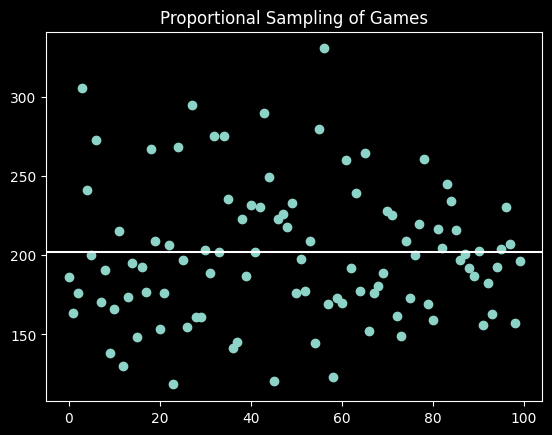

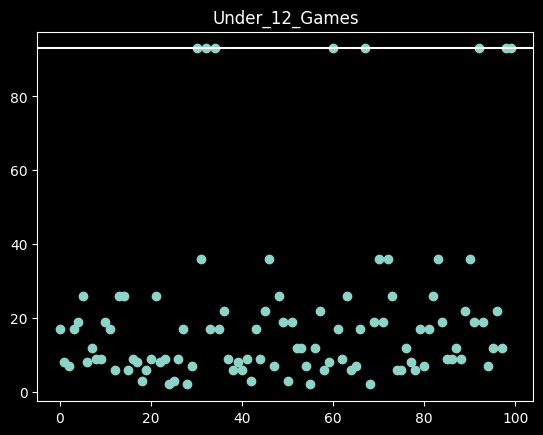

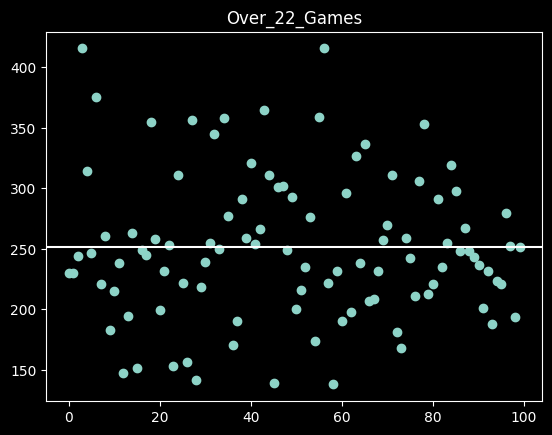

In [ ]:
plt.scatter(range(100), proportional_sampling_means)
plt.axhline(wnba['PTS'].mean(numeric_only=True))
plt.title('Proportional Sampling of Games')
plt.show()

plt.scatter(range(100), sample_under_12_means)
plt.axhline(sample_under_12.mean(numeric_only=True))
plt.title('Under_12_Games')
plt.show()

plt.scatter(range(100), sample_over_22_means)
plt.axhline(sample_over_22.mean(numeric_only=True))
plt.title('Over_22_Games')
plt.show()

In [ ]:
print(wnba['MIN'].value_counts(bins = 3, normalize = True))

(347.333, 682.667]    0.349650
(10.993, 347.333]     0.335664
(682.667, 1018.0]     0.314685
Name: MIN, dtype: float64


In [ ]:
wnba.columns

Index(['Name', 'Team', 'Pos', 'Height', 'Weight', 'BMI', 'Birth_Place',
       'Birthdate', 'Age', 'College', 'Experience', 'Games Played', 'MIN',
       'FGM', 'FGA', 'FG%', '15:00', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PTS', 'DD2', 'TD3',
       'Pts_per_game'],
      dtype='object')

In [ ]:
under_12 = wnba[wnba['Games Played'] <= 12]
btw_13_22 = wnba[(wnba['Games Played'] > 12) & (wnba['Games Played'] <= 22)]
over_22 = wnba[wnba['Games Played'] > 22]

# print(under_12.shape)
# print(btwn_13_22.shape)
# print(over_22.shape)


sample_under_12_means = []
sample_btw_13_22_means = []
sample_over_22_means = []

proportional_sampling_means = []


for i in range(100):
    sample_under_12 = under_12['PTS'].sample(1, random_state=i)
    sample_under_12_means.append(sample_under_12.mean(numeric_only=True))
    
    sample_btw_13_22 = btw_13_22['PTS'].sample(2, random_state=i)
    sample_btw_13_22_means.append(sample_btw_13_22.mean(numeric_only=True))
    
    sample_over_22 = over_22['PTS'].sample(7, random_state=i)
    sample_over_22_means.append(sample_over_22.mean(numeric_only=True))

    final_sample = pd.concat([sample_under_12, sample_btw_13_22, sample_over_22])
    proportional_sampling_means.append(final_sample.mean(numeric_only=True))

In [ ]:
print(wnba['Team'].unique())
print(pd.Series(wnba['Team'].unique()).sample(4, random_state = 0))

['DAL' 'LA' 'CON' 'SAN' 'MIN' 'SEA' 'PHO' 'CHI' 'WAS' 'NY' 'ATL' 'IND']
6     PHO
11    IND
4     MIN
10    ATL
dtype: object


In [ ]:
print(wnba['Team'].unique())
clusters = pd.Series(wnba['Team'].unique()).sample(4, random_state = 0)

sample = pd.DataFrame()

for cluster in clusters:
    data_collected = wnba[wnba['Team'] == cluster]
    sample= pd.concat([data_collected])
    print(cluster)



['DAL' 'LA' 'CON' 'SAN' 'MIN' 'SEA' 'PHO' 'CHI' 'WAS' 'NY' 'ATL' 'IND']
PHO
IND
MIN
ATL


In [ ]:
print(wnba['Team'].unique())
clusters = pd.Series(wnba['Team'].unique()).sample(4, random_state = 0)

sample = pd.DataFrame()

for cluster in clusters:
    data_collected = wnba[wnba['Team'] == cluster]
    sample = pd.concat([sample, data_collected])
    print(cluster)



['DAL' 'LA' 'CON' 'SAN' 'MIN' 'SEA' 'PHO' 'CHI' 'WAS' 'NY' 'ATL' 'IND']
PHO
IND
MIN
ATL


In [ ]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 6 to 138
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          46 non-null     object 
 1   Team          46 non-null     object 
 2   Pos           46 non-null     object 
 3   Height        46 non-null     int64  
 4   Weight        46 non-null     float64
 5   BMI           46 non-null     float64
 6   Birth_Place   46 non-null     object 
 7   Birthdate     46 non-null     object 
 8   Age           46 non-null     int64  
 9   College       46 non-null     object 
 10  Experience    46 non-null     object 
 11  Games Played  46 non-null     int64  
 12  MIN           46 non-null     int64  
 13  FGM           46 non-null     int64  
 14  FGA           46 non-null     int64  
 15  FG%           46 non-null     float64
 16  15:00         46 non-null     int64  
 17  3PA           46 non-null     int64  
 18  3P%           46 non-null     f

Our cluster is a random seletion of 4 out of 12 possible team values. We use that subset to calculate means and compare the means from the subset to the means from the group. This can help us determine stronger correlations and variance within the dataset. This process can be repeated and even be automated...

The data from the 4 randomly selected teams is collected and stored in a new DF ('sample'). From there we calculate the mean values for th values we want to compare to the full dataset, WNBA.

In [ ]:
clusters = pd.Series(wnba['Team'].unique()).sample(4, random_state = 0)

sample = pd.DataFrame()

for cluster in clusters:
    data_collected = wnba[wnba['Team'] == cluster]
    sample = sample.append(data_collected)

sampling_error_height = wnba['Height'].mean(numeric_only=True) - sample['Height'].mean(numeric_only=True)
sampling_error_age = wnba['Age'].mean(numeric_only=True) - sample['Age'].mean(numeric_only=True)
sampling_error_BMI = wnba['BMI'].mean(numeric_only=True) - sample['BMI'].mean(numeric_only=True)
sampling_error_points = wnba['PTS'].mean(numeric_only=True) - sample['PTS'].mean(numeric_only=True)

<ipython-input-47-2a3ebbcf616f>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample = sample.append(data_collected)
<ipython-input-47-2a3ebbcf616f>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample = sample.append(data_collected)
<ipython-input-47-2a3ebbcf616f>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample = sample.append(data_collected)
<ipython-input-47-2a3ebbcf616f>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample = sample.append(data_collected)


In [ ]:
import pandas as pd

Pandas will be deprecating the append method as it does not utilize arrays and vectors like concat does. Using concat methodoly is far more effecient (especially with larger datasets)

In [ ]:
from collections.abc import Sequence
clusters = pd.Series(wnba['Team'].unique()).sample(4, random_state = 0)

sample = pd.DataFrame()

for cluster in clusters:
    data_collected = wnba[wnba['Team'] == cluster]
    sample = pd.concat([sample, data_collected], axis=0, ignore_index=True, keys='sequence')

In [ ]:
sample.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3,Pts_per_game
0,Alexis Prince,PHO,G,188.0,81.0,22.917610,US,"February 5, 1994",23.0,Baylor,...,14.0,15.0,5.0,4.0,3.0,3.0,24.0,0.0,0.0,1.500000
1,Angel Robinson,PHO,F/C,198.0,88.0,22.446689,US,"August 30, 1995",21.0,Arizona State,...,42.0,58.0,8.0,1.0,11.0,16.0,58.0,0.0,0.0,3.866667
2,Brittney Griner,PHO,C,206.0,93.0,21.915355,US,"October 18, 1990",26.0,Baylor,...,129.0,172.0,39.0,13.0,54.0,52.0,461.0,6.0,0.0,20.954545
3,Camille Little,PHO,F,188.0,82.0,23.200543,US,"January 18, 1985",32.0,North Carolina,...,71.0,113.0,42.0,28.0,13.0,50.0,228.0,0.0,0.0,7.600000
4,Cayla George,PHO,C,193.0,87.0,23.356332,AU,"April 20, 1987",30.0,Georgia,...,71.0,81.0,15.0,9.0,11.0,13.0,100.0,1.0,0.0,3.571429


In [ ]:
print(sampling_error_height)
print(sampling_error_age)
print(sampling_error_BMI)
print(sampling_error_points) 

-0.06400121617511445
-1.401337792642142
0.23095444165951662
-27.79674673152934


In [ ]:


variables = {'Name': '', 'Team': '', 'Pos': '', 'Height': '', 'BMI': '',
             'Birth_Place': '', 'Birthdate': '', 'Age': '', 'College': '', 'Experience': '',
             'Games Played': '', 'MIN': '', 'FGM': '', 'FGA': '',
             '3PA': '', 'FTM': '', 'FTA': '', 'FT%': '', 'OREB': '', 'DREB': '',
             'REB': '', 'AST': '', 'PTS': ''}


variables = {'Name': 'qualitative', 'Team': 'qualitative', 'Pos': 'qualitative',
             'Height': 'quantitative', 'BMI': 'quantitative',
             'Birth_Place': 'qualitative', 'Birthdate': 'quantitative', 'Age': 'quantitative', 
             'College': 'qualitative', 'Experience': 'quantitative', 'Games Played': 'quantitative',
             'MIN': 'quantitative', 'FGM': 'quantitative', 'FGA': 'quantitative',
             '3PA': 'quantitative', 'FTM': 'quantitative',
             'FTA': 'quantitative', 'FT%': 'quantitative', 'OREB': 'quantitative', 'DREB': 'quantitative',
             'REB': 'quantitative', 'AST': 'quantitative', 'PTS': 'quantitative'}

In [ ]:
wnba.dtypes == 'object'

Name             True
Team             True
Pos              True
Height          False
Weight          False
BMI             False
Birth_Place      True
Birthdate        True
Age             False
College          True
Experience       True
Games Played    False
MIN             False
FGM             False
FGA             False
FG%             False
15:00           False
3PA             False
3P%             False
FTM             False
FTA             False
FT%             False
OREB            False
DREB            False
REB             False
AST             False
STL             False
BLK             False
TO              False
PTS             False
DD2             False
TD3             False
Pts_per_game    False
dtype: bool

In [ ]:
object_cols = wnba.dtypes[wnba.dtypes == 'object'].index
print(object_cols)


Index(['Name', 'Team', 'Pos', 'Birth_Place', 'Birthdate', 'College',
       'Experience'],
      dtype='object')


In [ ]:
object_data = wnba[object_cols]


In [ ]:
print(object_data)

                 Name Team  Pos Birth_Place           Birthdate  \
0       Aerial Powers  DAL    F          US    January 17, 1994   
1         Alana Beard   LA  G/F          US        May 14, 1982   
2        Alex Bentley  CON    G          US    October 27, 1990   
3     Alex Montgomery  SAN  G/F          US   December 11, 1988   
4        Alexis Jones  MIN    G          US      August 5, 1994   
..                ...  ...  ...         ...                 ...   
138     Tiffany Hayes  ATL    G          US  September 20, 1989   
139   Tiffany Jackson   LA    F          US      April 26, 1985   
140  Tiffany Mitchell  IND    G          US  September 23, 1984   
141      Tina Charles   NY  F/C          US        May 12, 1988   
142     Yvonne Turner  PHO    G          US    October 13, 1987   

            College Experience  
0    Michigan State          2  
1              Duke         12  
2        Penn State          4  
3      Georgia Tech          6  
4            Baylor          R

In [ ]:
numeric_cols = wnba.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
numeric_data = wnba[numeric_cols]

In [ ]:
print(len(wnba.columns))
print(len(numeric_data.columns))
print(len(object_data.columns))


33
26
7


In [ ]:
df_dtypes = pd.DataFrame(wnba.dtypes, columns=['Dtype'])
sorted_dtypes = df_dtypes.sort_values(by=['Dtype'])

# print(sorted_dtypes)

nominal_scale = wnba.select_dtypes(include=['object']).columns
nominal_scale = list(nominal_scale)
# print(wnba['Height_labels'].value_counts())
print(nominal_scale)

['Name', 'Team', 'Pos', 'Birth_Place', 'Birthdate', 'College', 'Experience']


In [ ]:
df_nominal_scale = pd.DataFrame(object_data)
df_nominal_scale.head()

,Name,Team,Pos,Birth_Place,Birthdate,College,Experience
0,Aerial Powers,DAL,F,US,"January 17, 1994",Michigan State,2
1,Alana Beard,LA,G/F,US,"May 14, 1982",Duke,12
2,Alex Bentley,CON,G,US,"October 27, 1990",Penn State,4
3,Alex Montgomery,SAN,G/F,US,"December 11, 1988",Georgia Tech,6
4,Alexis Jones,MIN,G,US,"August 5, 1994",Baylor,R


In [ ]:
experience_col = df_nominal_scale['Experience'].copy()
df_nominal_scale = df_nominal_scale.drop(columns=['Experience'])

In [ ]:
experience_col.value_counts()

R     23
3     19
6     14
5     14
1     12
2     11
4     11
9     11
10     5
12     4
11     4
7      4
8      3
13     3
14     3
15     2
Name: Experience, dtype: int64

In [ ]:
exp_rep = {'R': 0}

experience_col = experience_col.replace(exp_rep)

In [ ]:
print(experience_col.value_counts())

0     23
3     19
6     14
5     14
1     12
2     11
4     11
9     11
10     5
12     4
11     4
7      4
8      3
13     3
14     3
15     2
Name: Experience, dtype: int64


In [ ]:
experience_col = experience_col.astype('int')

In [ ]:
experience_col.dtypes

dtype('int64')

In [ ]:
wnba['Experience'] = experience_col

In [ ]:
numeric_cols = wnba.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
numeric_data = wnba[numeric_cols]

In [ ]:
print(numeric_data.columns)

Index(['Height', 'Weight', 'BMI', 'Age', 'Experience', 'Games Played', 'MIN',
       'FGM', 'FGA', 'FG%', '15:00', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PTS', 'DD2', 'TD3',
       'Pts_per_game'],
      dtype='object')


In [ ]:
interval = ['Birthdate']
ratio = sorted(['Height', 'Weight', 'BMI', 'Age', 'Experience', 'Games Played', 'MIN', 'FGM', 'FGA', 'FG%', '15:00', 
                '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO',
                'PTS', 'DD2', 'TD3'])

In [ ]:
freq_distro_pos = wnba['Pos'].value_counts()
freq_distro_height = wnba['Height'].value_counts()

In [ ]:
age_ascending = wnba['Age'].value_counts().sort_values()
age_descending = wnba['Age'].value_counts()
age_over_30 = wnba['Age'] > 30
print(age_over_30.value_counts())

False    114
True      29
Name: Age, dtype: int64


In [ ]:
def make_pts_ordinal(row):
    if row['PTS'] <= 20:
        return 'very few points'
    if (20 < row['PTS'] <=  80):
        return 'few points'
    if (80 < row['PTS'] <=  150):
        return 'many, but below average'
    if (150 < row['PTS'] <= 300):
        return 'average number of points'
    if (300 < row['PTS'] <=  450):
        return 'more than average'
    else:
        return 'much more than average'
    
wnba['PTS_ordinal_scale'] = wnba.apply(make_pts_ordinal, axis = 1)

print(wnba['PTS_ordinal_scale'].value_counts())

average number of points    45
few points                  27
many, but below average     25
more than average           21
much more than average      13
very few points             12
Name: PTS_ordinal_scale, dtype: int64


iloc allows us to reorder the values based on their index position.

In [ ]:
pts_ordinal_desc = wnba['PTS_ordinal_scale'].value_counts().iloc[[4, 3, 0, 2, 1, 5]]
print(pts_ordinal_desc)

much more than average      13
more than average           21
average number of points    45
many, but below average     25
few points                  27
very few points             12
Name: PTS_ordinal_scale, dtype: int64


In [ ]:
guards = wnba['Pos'] == 'G'
guard_count = guards.sum()
player_count = wnba['Pos'].shape[0]
guard_proportion = round(guard_count / player_count, 2)
centers = wnba['Pos'] == 'C'
center_count = centers.sum()
center_proportion = round(center_count / player_count, 2)
print(wnba['Pos'].value_counts())
mixed_positions = wnba['Pos'].value_counts().iloc[[3,4]]
print(mixed_positions.sum())
mixed_positions_percentage = round(mixed_positions.sum() / player_count, 2)

G      60
F      33
C      25
G/F    13
F/C    12
Name: Pos, dtype: int64
25


In [ ]:
percentages = wnba['Age'].value_counts(normalize = True).sort_index() * 100
proportion_25 = percentages[25] / 100
percentage_30 = percentages[30]
percentage_over_30 = percentages.loc[30:].sum()
percentage_below_23 = percentages.loc[:23].sum()

In [ ]:
percentage_test = percentages.loc[:].sum()
print(percentage_test)

100.0


In [ ]:
print(percentages)

21     1.398601
22     6.993007
23    10.489510
24    11.188811
25    10.489510
26     8.391608
27     9.090909
28     9.790210
29     5.594406
30     6.293706
31     5.594406
32     5.594406
33     2.097902
34     3.496503
35     2.797203
36     0.699301
Name: Age, dtype: float64


In [ ]:
print(proportion_25)
print(percentage_30)
print(percentage_over_30)
print(percentage_below_23)


0.1048951048951049
6.293706293706294
26.573426573426573
18.88111888111888


In [ ]:
age_count = wnba['Age'].shape[0]
age_25 = wnba['Age'] == 25
age_25 = age_25.sum()
proportion_25 = age_25 / age_count

age_30 = wnba['Age'] == 30
age_30_count = age_30.sum()
percentage_30 = 100 * age_30_count / age_count

percentage_over_30 = wnba['Age'] >= 30
percentage_over_30_count = percentage_over_30.sum()
percentage_over_30 = percentage_over_30_count / age_count * 100

percentage_below_23 = wnba['Age'] <= 23
percentage_below_23_count = percentage_below_23.sum()
percentage_below_23 = percentage_below_23_count / age_count *100

In [ ]:
print(percentage_below_23)

18.88111888111888


In [ ]:
age_chart = wnba['Age'].value_counts(normalize=True).sort_index()*100
age_chart.loc[:23].sum()

18.88111888111888

Weak indicates less than or equal to.

In [ ]:
from scipy.stats import percentileofscore
print(percentileofscore(a = wnba['Age'], score = 23, kind = 'weak'))

18.88111888111888


By subtracting all the % values that are less than or equal to 29 from 100 we find all the values that are 30 or greater. 

In [ ]:
from scipy.stats import percentileofscore
print(100 - percentileofscore(wnba['Age'], 29, kind = 'weak'))

26.573426573426573


In [ ]:
percentile_rank_half_less = round(percentileofscore(a = wnba['Games Played'], score = 17, kind = 'weak'), 2)
percentage_half_more = round(100 - percentile_rank_half_less, 2)
print(percentile_rank_half_less, percentage_half_more, sep='\n')

16.08
83.92


Within describes parameters, we can select the values we want the percentage rank output for - by default, describe uses quartiles (25, 50, 75, 100) and selects the values for each respective percentage rank (all values less than or equal to percenage rank). We can select just the output we want with iloc. We used loc prior because we were selecting specific values in the index. With ilco we select based on integer position.

In [ ]:
print(wnba['Age'].describe())
print(wnba['Age'].describe(percentiles = [.1, .15, .33, .5, .592, .85, .90]).iloc[3:])

count    143.000000
mean      27.076923
std        3.679170
min       21.000000
25%       24.000000
50%       27.000000
75%       30.000000
max       36.000000
Name: Age, dtype: float64
min      21.0
10%      23.0
15%      23.0
33%      25.0
50%      27.0
59.2%    28.0
85%      31.0
90%      32.0
max      36.0
Name: Age, dtype: float64


Upper quartile is 75% and lower quartile is 25% 

In [ ]:
age_upper_quartile   = wnba['Age'].describe().iloc[-2]
age_middle_quartile   = wnba['Age'].describe().iloc[-3]
age_95th_percentile = wnba['Age'].describe(percentiles = [.95]).iloc[-2]

The range between the upper and lower weight is 58kg.

In [ ]:
print(wnba['Weight'].value_counts().sort_index(ascending=False))

113.0     2
108.0     1
104.0     2
97.0      1
96.0      2
95.0      2
93.0      3
91.0      3
90.0      2
89.0      3
88.0      6
87.0      6
86.0      7
85.0      2
84.0      9
83.0      4
82.0      4
81.0      5
80.0      3
79.0      6
78.0      5
77.0     10
76.0      4
75.0      4
74.0      4
73.0      6
71.0      2
70.0      3
69.0      2
68.0      2
67.0      1
66.0      8
65.0      4
64.0      5
63.0      3
62.0      1
59.0      2
58.0      1
57.0      1
55.0      1
Name: Weight, dtype: int64


Using value_counts, bin parameter - we can divide the distribution of our sample by n even parts. We are going to distribute the weight distribution into 10 bins so 58KG should be subdivided into 10 equal 5.8kg segments

( - indicates starting point is not included
**]** - indicates ending point is included

When we add bins, a frequency table becomes known as a **'Grouped Frequency Distribution Table'**

In [ ]:
print(wnba['Weight'].value_counts(bins=10).sort_index(ascending=False))

(107.2, 113.0]     3
(101.4, 107.2]     2
(95.6, 101.4]      3
(89.8, 95.6]      10
(84.0, 89.8]      24
(78.2, 84.0]      31
(72.4, 78.2]      33
(66.6, 72.4]      10
(60.8, 66.6]      21
(54.941, 60.8]     5
Name: Weight, dtype: int64


In [ ]:
grouped_freq_table = wnba['PTS'].value_counts(bins=10, normalize=True).sort_index(ascending=False) * 100
print(grouped_freq_table)

(525.8, 584.0]     3.496503
(467.6, 525.8]     2.797203
(409.4, 467.6]     5.594406
(351.2, 409.4]     6.993007
(293.0, 351.2]     5.594406
(234.8, 293.0]    11.888112
(176.6, 234.8]    13.986014
(118.4, 176.6]    11.888112
(60.2, 118.4]     16.783217
(1.417, 60.2]     20.979021
Name: PTS, dtype: float64


Pandas interval range method lets us create our own interval ranges and distributions through: start, end and freq parameters. This could be used for setting ticks on a chart or to set manually set our own specific distribution ranges (when needed).

In [ ]:
print(wnba['PTS'].value_counts(bins = 6).sort_index())
intervals = pd.interval_range(start = 0, end = 600, freq = 100)
print(intervals)

(1.417, 99.0]     48
(99.0, 196.0]     27
(196.0, 293.0]    33
(293.0, 390.0]    13
(390.0, 487.0]    13
(487.0, 584.0]     9
Name: PTS, dtype: int64
IntervalIndex([(0, 100], (100, 200], (200, 300], (300, 400], (400, 500], (500, 600]], dtype='interval[int64, right]')


By passing the interval variable we created using Pandas interval_range method to bin = in a frequency chart, we can have the distribution calculated for our whatever interval range we choose to set. 

From the perspective of a reader, we know how interval ranges that are much more logical and easier to follow (audience is always a key component with data).

We can see the sum of the freq table with our interval distribution is 143 which matches the amount of players in the entire sample.

In [ ]:
print(wnba['PTS'].value_counts(bins = intervals).sort_index())
pts_freq_table = wnba['PTS'].value_counts(bins = intervals).sort_index()
print(pts_freq_table.sum())

(0, 100]      49
(100, 200]    28
(200, 300]    32
(300, 400]    17
(400, 500]    10
(500, 600]     7
Name: PTS, dtype: int64
143


In [ ]:
print(wnba['Height'].value_counts()[175])

16


In [ ]:
print(wnba['Height'].describe().iloc[3:])

min    165.0
25%    176.5
50%    185.0
75%    191.0
max    206.0
Name: Height, dtype: float64


<Axes: >

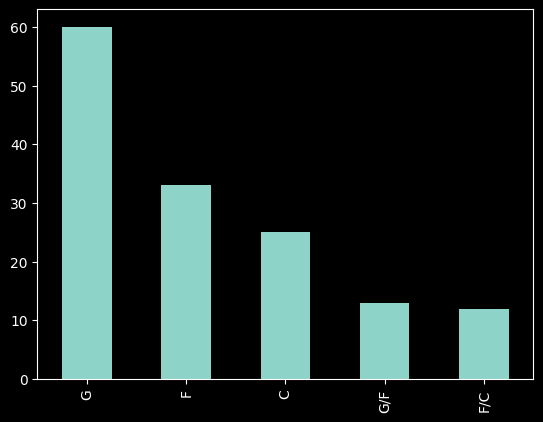

In [ ]:
wnba['Pos'].value_counts().plot.bar()

The use of bins makes this dataset chartable and extremly informative even with just 5 bins now. We can see that 54 people had 118 points or less and 27 people had 352 to 584 points

<Axes: >

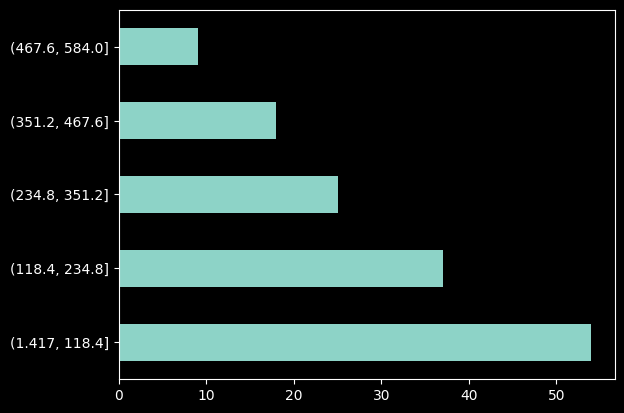

In [ ]:
wnba['PTS'].value_counts(bins=5).plot.barh()

In [ ]:
wnba['PTS'].value_counts(bins=5)

(1.417, 118.4]    54
(118.4, 234.8]    37
(234.8, 351.2]    25
(351.2, 467.6]    18
(467.6, 584.0]     9
Name: PTS, dtype: int64

In [ ]:
wnba.columns

Index(['Name', 'Team', 'Pos', 'Height', 'Weight', 'BMI', 'Birth_Place',
       'Birthdate', 'Age', 'College', 'Experience', 'Games Played', 'MIN',
       'FGM', 'FGA', 'FG%', '15:00', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PTS', 'DD2', 'TD3',
       'Pts_per_game', 'PTS_ordinal_scale'],
      dtype='object')

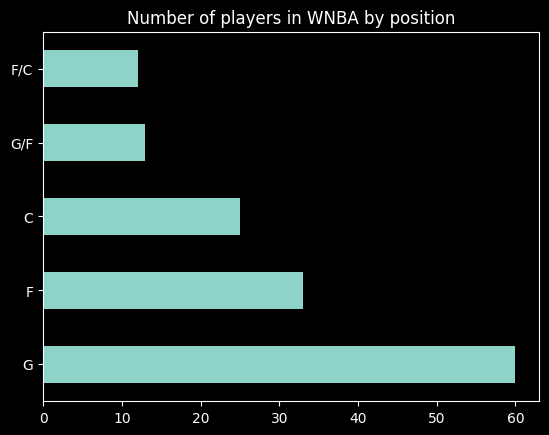

In [ ]:
wnba['Pos'].value_counts().plot.barh(title = 'Number of players in WNBA by position')
plt.show()

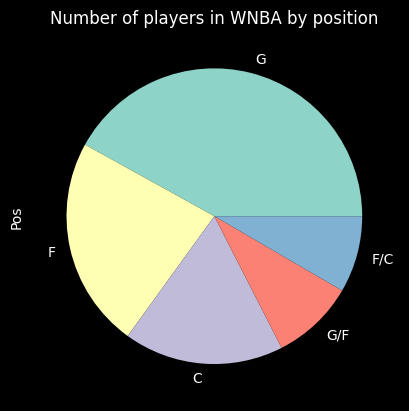

In [ ]:
wnba['Pos'].value_counts().plot.pie(title = 'Number of players in WNBA by position')
plt.show()

Text(0, 0.5, '')

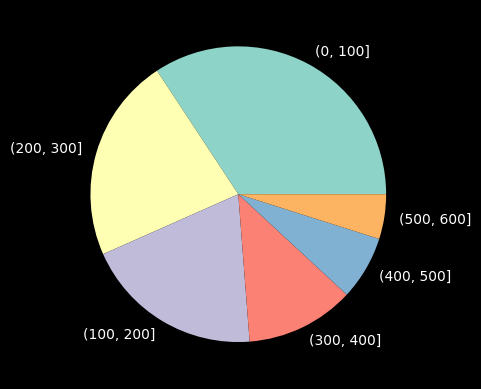

In [ ]:
wnba['PTS'].value_counts(bins=intervals).plot.pie()
plt.ylabel('')

<Axes: ylabel='PTS'>

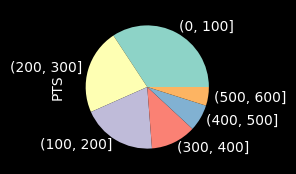

In [ ]:
wnba['PTS'].value_counts(bins=intervals).plot.pie(figsize = (2,2) )

By using the autopct parameter we can have the percentages for our pie chart output directly on their respectice wedges. 

% announces string format

.1 the level of decimal point precision (number of decimal points to measure)

f display number as fixed point number

% want to use percentages
% include % percentage symbol in output

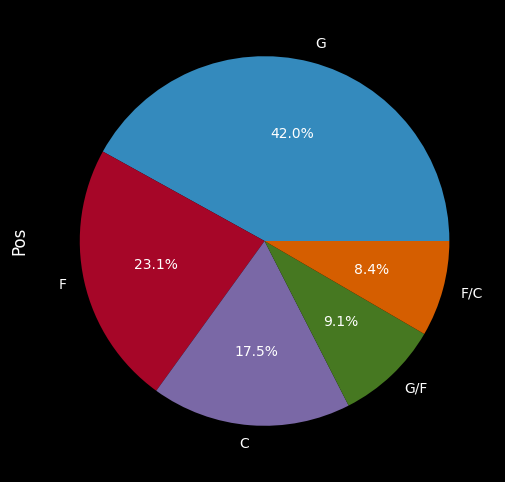

In [ ]:
style.use('bmh')
wnba['Pos'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')
plt.show()

histograms by default use a bin frequency of n = 10. you can set hist(bins=n) 

<Axes: ylabel='Frequency'>

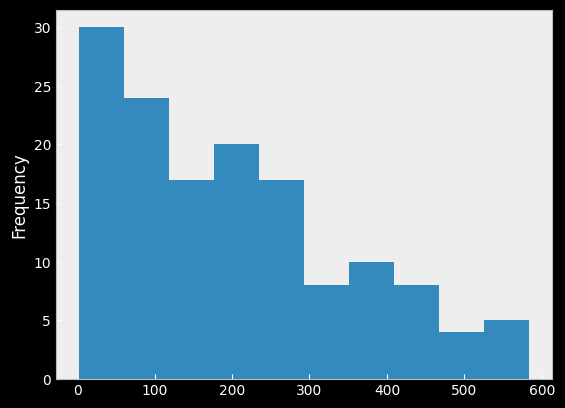

In [ ]:
wnba['PTS'].plot.hist(grid=False)

Matches the output of our default histogram

In [ ]:
wnba['PTS'].value_counts(bins=10).sort_index()

(1.417, 60.2]     30
(60.2, 118.4]     24
(118.4, 176.6]    17
(176.6, 234.8]    20
(234.8, 293.0]    17
(293.0, 351.2]     8
(351.2, 409.4]    10
(409.4, 467.6]     8
(467.6, 525.8]     4
(525.8, 584.0]     5
Name: PTS, dtype: int64

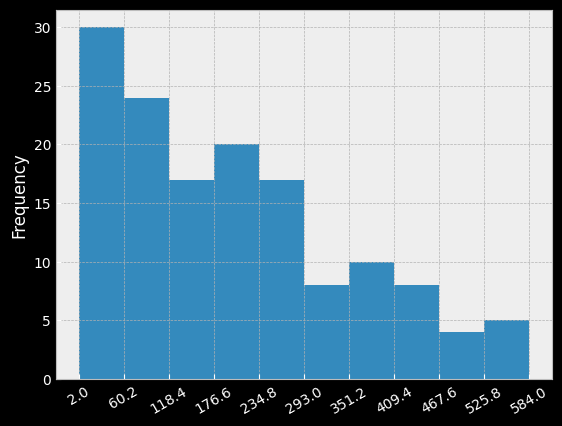

In [ ]:
from numpy import arange

wnba['PTS'].plot.hist(grid = True, xticks = arange(2,585,58.2), rot = 30)
plt.show()

count    143.000000
mean      24.356643
std        7.104259
min        2.000000
25%       22.000000
50%       27.000000
75%       29.000000
max       32.000000
Name: Games Played, dtype: float64


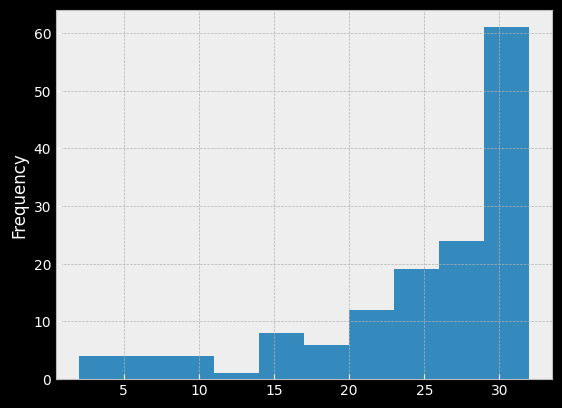

In [ ]:
print(wnba['Games Played'].describe())
wnba['Games Played'].plot.hist()
plt.show()

We can set the range 

In [ ]:
wnba['PTS'].describe()

count    143.000000
mean     201.790210
std      153.381548
min        2.000000
25%       75.000000
50%      177.000000
75%      277.500000
max      584.000000
Name: PTS, dtype: float64

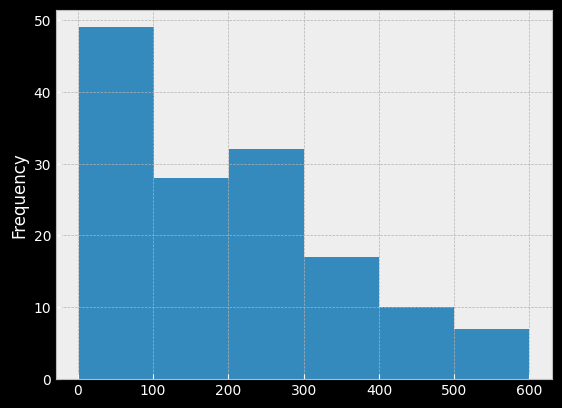

In [ ]:
wnba['PTS'].plot.hist(range = (1,600), bins = 6)
plt.show()

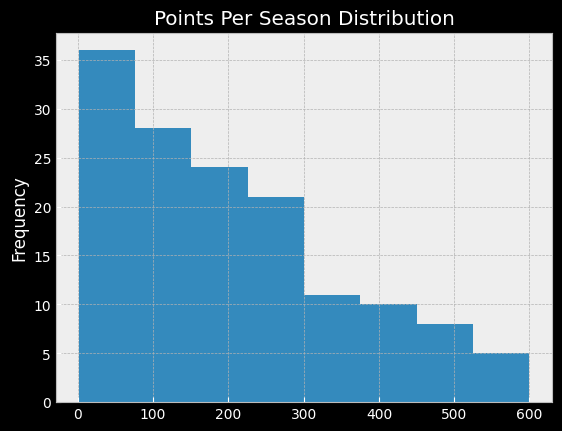

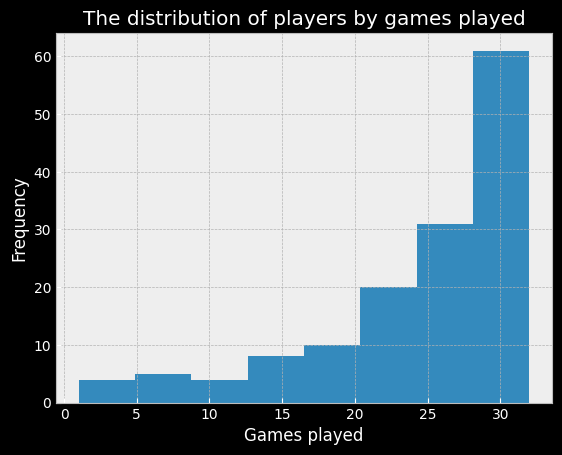

(1.969, 5.75]     5
(5.75, 9.5]       5
(9.5, 13.25]      3
(13.25, 17.0]    10
(17.0, 20.75]     8
(20.75, 24.5]    20
(24.5, 28.25]    31
(28.25, 32.0]    61
Name: Games Played, dtype: int64


In [ ]:
wnba['PTS'].plot.hist(range = (1,600), bins = 8, title='Points Per Season Distribution')
plt.show()
wnba['Games Played'].plot.hist(range = (1,32), bins=8, title ='The distribution of players by games played')
plt.xlabel('Games played')
plt.show()
print(wnba['Games Played'].value_counts(bins=8).sort_index())

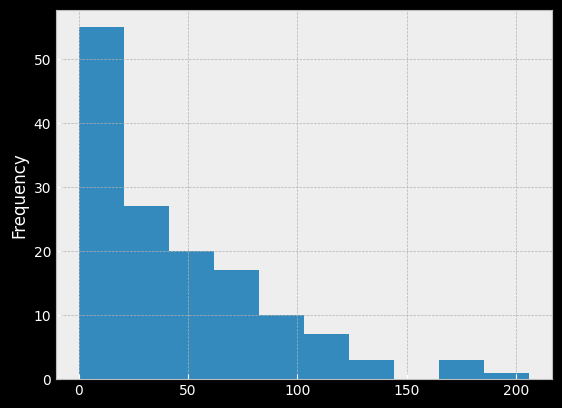

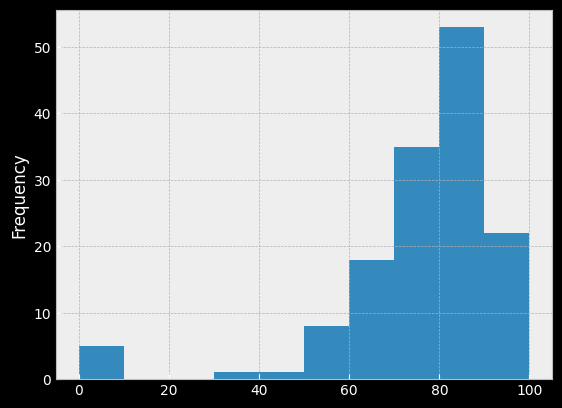

In [ ]:
wnba['AST'].plot.hist()
plt.show()
wnba['FT%'].plot.hist()
plt.show()

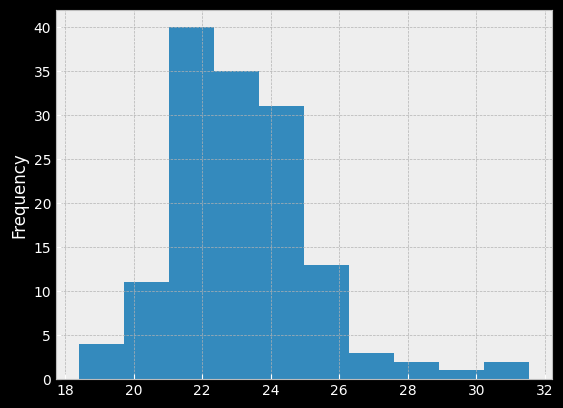

In [ ]:
import matplotlib.pyplot as plt

wnba['BMI'].plot.hist()
plt.show()

Not surprisingly for a basketball team, Height follows the most normal frequency distribution (majority of values in center with outer edges falling off progressively).

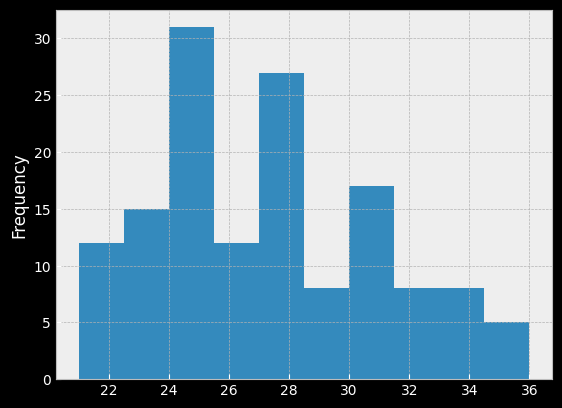

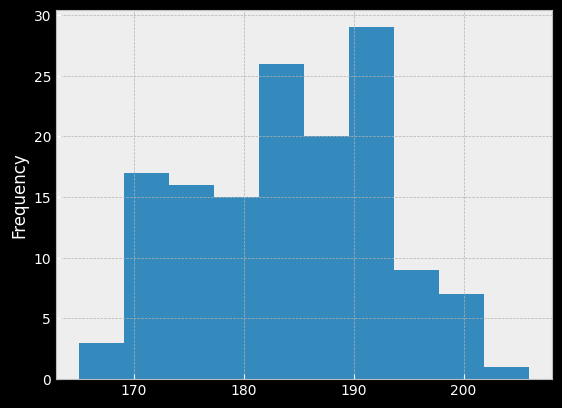

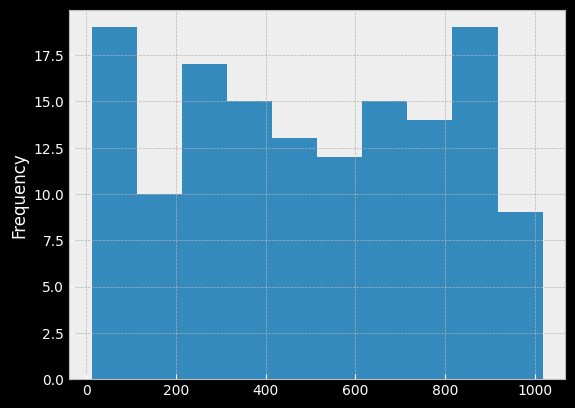

In [ ]:
wnba['Age'].plot.hist()
plt.show()
wnba['Height'].plot.hist()
plt.show()
wnba['MIN'].plot.hist()
plt.show()


Years in WNBA	Label

0	Rookie

1-3	Little experience

4-5	Experienced

5-10	Very experienced

>10	Veteran

In [ ]:
def make_exp_ordinal(row):
  if row['Experience'] == 0:
      return 'Rookie'
  if (1 < row['Experience'] <= 3):
      return 'Little Experience'
  if (4 < row['Experience'] <= 5):
      return 'Experienced'
  if (5 < row['Experience'] <= 10):
      return 'Very experienced'
  else:
    return 'Veteran'
wnba['Exp_ordinal_scale'] = wnba.apply(make_exp_ordinal, axis = 1)


In [ ]:
print(wnba['Exp_ordinal_scale'].value_counts())

Veteran              39
Very experienced     37
Little Experience    30
Rookie               23
Experienced          14
Name: Exp_ordinal_scale, dtype: int64


In [ ]:
print(wnba['Exp_ordinal_scale'].describe())

count         143
unique          5
top       Veteran
freq           39
Name: Exp_ordinal_scale, dtype: object


In [ ]:
rookies = wnba[wnba['Exp_ordinal_scale'] == 'Rookie']
little_xp = wnba[wnba['Exp_ordinal_scale'] == 'Little Experience']
experienced = wnba[wnba['Exp_ordinal_scale'] == 'Experienced']
very_xp = wnba[wnba['Exp_ordinal_scale'] == 'Very experienced']
veterans =  wnba[wnba['Exp_ordinal_scale'] == 'Veteran']

In [ ]:
rookies['Pos'].value_counts()

G      14
C       4
F       4
F/C     1
Name: Pos, dtype: int64

<Axes: >

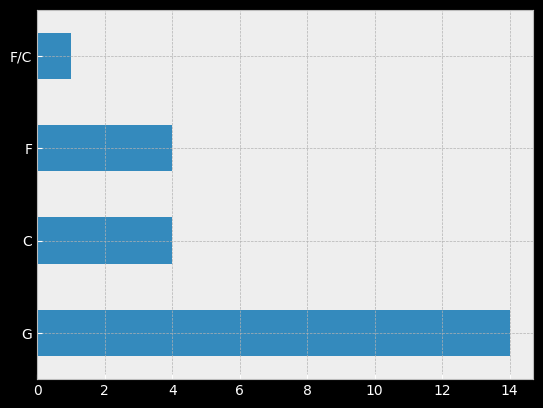

In [ ]:
rookies['Pos'].value_counts().plot.barh()

In [ ]:
rookie_distro = rookies['Pos'].value_counts()
little_xp_distro = little_xp['Pos'].value_counts()
experienced_distro =  experienced['Pos'].value_counts()
very_xp_distro = very_xp['Pos'].value_counts()
veterans_distro = veterans['Pos'].value_counts()


In [ ]:
print(experienced_distro)

G      5
C      3
F/C    2
G/F    2
F      2
Name: Pos, dtype: int64


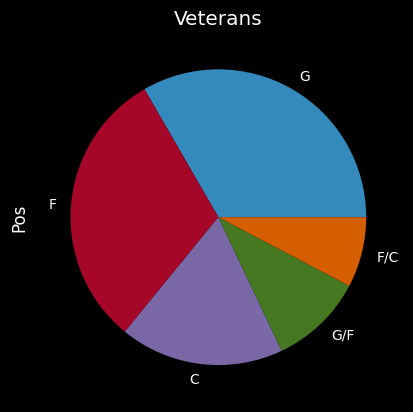

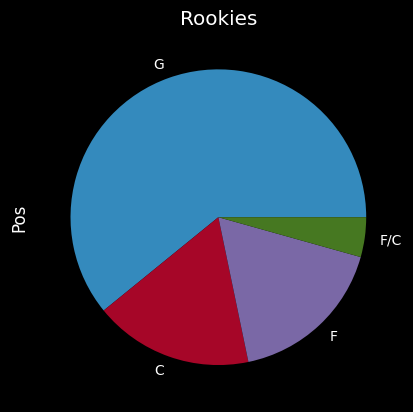

In [ ]:
veterans_distro.plot.pie(title='Veterans')
plt.show()
rookie_distro.plot.pie(title='Rookies')
plt.show()

Using Seaborn's countplot function we can plot the entire Exp_ordinal_scale column across the x access. We select the position column to be represented as a hue and we can see the different positions, color coded for every level of experience. 

Guards are predominant at all levels of experience. Guard forwards and forward enters are more prevelant as experience level increases. 

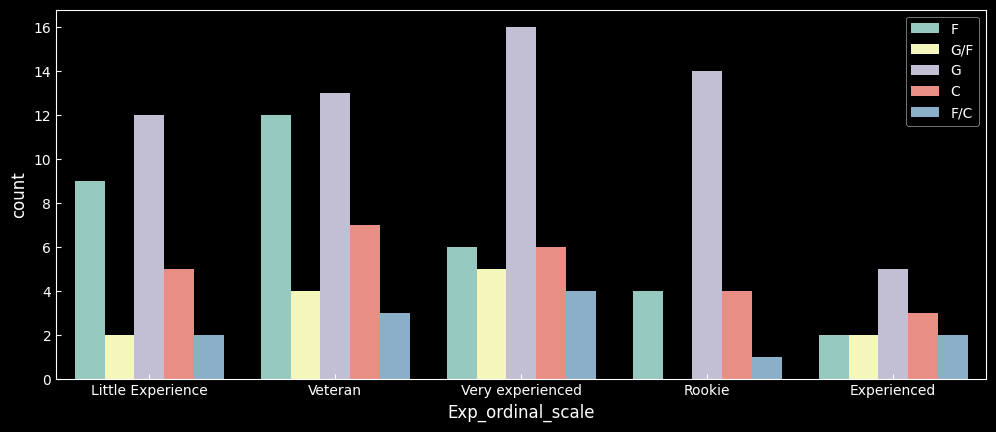

In [ ]:
import seaborn as sns
style.use('dark_background')
plt.figure().set_figwidth(12)
sns.countplot(x ='Exp_ordinal_scale' , hue ='Pos' , data=wnba)
plt.grid(False)
plt.legend()
plt.show()

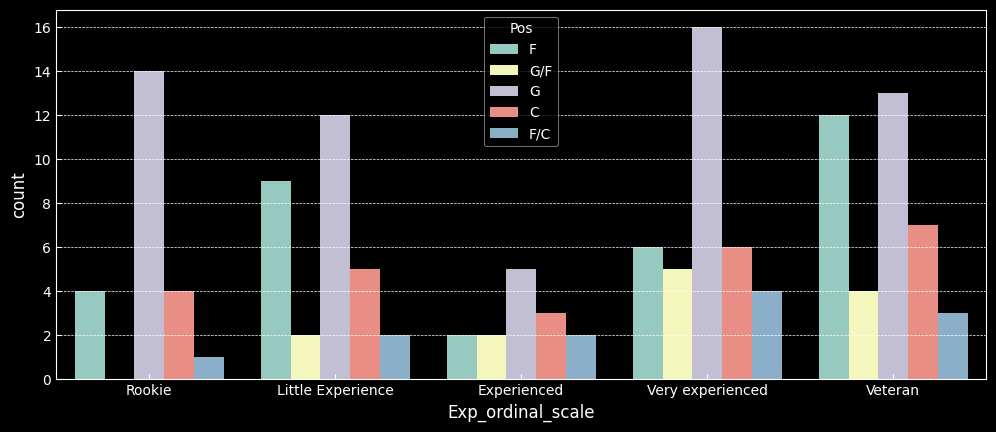

In [ ]:
style.use('dark_background')
plt.figure().set_figwidth(12)
sns.countplot(x ='Exp_ordinal_scale' , hue ='Pos', data=wnba, order = ['Rookie', 'Little Experience', 'Experienced', 'Very experienced', 'Veteran'])
plt.show()

We can even reorder the elements in HUE (currently set to the POS field)



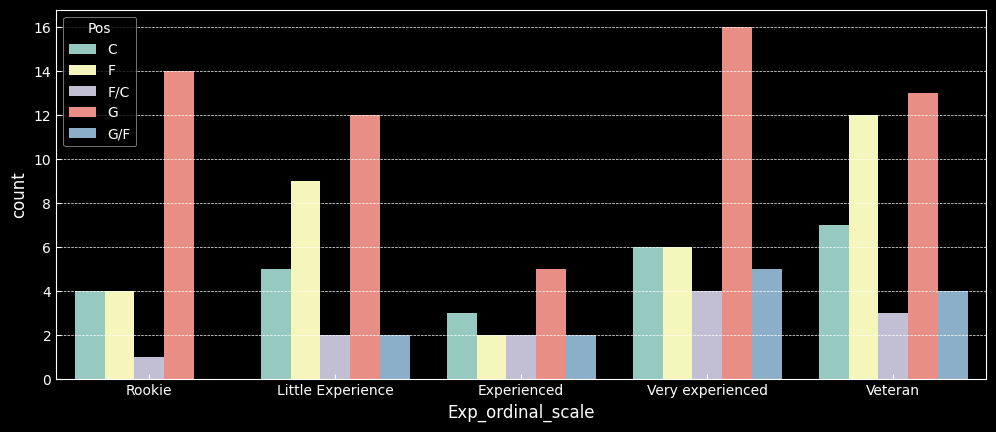

In [ ]:
plt.figure().set_figwidth(12)
sns.countplot(x ='Exp_ordinal_scale' , hue ='Pos', data=wnba, order = ['Rookie', 'Little Experience', 'Experienced', 'Very experienced', 'Veteran'], hue_order=['C', 'F', 'F/C', 'G', 'G/F'])
plt.show()

In [ ]:
print(wnba['Exp_ordinal_scale'].value_counts())

Veteran              39
Very experienced     37
Little Experience    30
Rookie               23
Experienced          14
Name: Exp_ordinal_scale, dtype: int64


In [ ]:
print('Average Mins Per Season By Experience')
print('Rookies:', round(rookies['MIN'].mean(),2))
print('Little Experience:', round(little_xp['MIN'].mean(),2))
print('Experienced:', round(experienced['MIN'].mean(),2))
print('Very Experienced:', round(very_xp['MIN'].mean(),2))
print('Veterans:', round(veterans['MIN'].mean(),2))
print('Overall Average:', round(wnba['MIN'].mean(),2))

Average Mins Per Season By Experience
Rookies: 272.26
Little Experience: 485.17
Experienced: 492.86
Very Experienced: 596.14
Veterans: 545.97
Overall Average: 496.97


In [ ]:
print('Average age:', round(wnba['Age'].mean(), 2))

Average age: 27.08


In [ ]:
mean_age = wnba['Age'].mean()

def ordinal_age(row):
    if row['Age'] > mean_age:
        return 'Old'
    else:
        return 'Young'


In [ ]:
wnba['ordinal_age'] = wnba.apply(ordinal_age, axis=1)

In [ ]:
wnba['ordinal_age'].value_counts()

Young    83
Old      60
Name: ordinal_age, dtype: int64

In [ ]:
wnba['age_mean_relative'] = wnba['Age'].apply(lambda x: 'old' if x >= 27.08 else 'young')
wnba['min_mean_relative'] = wnba['MIN'].apply(lambda x: 'average or above' if x >= 497 else 'below average')

In [ ]:
print(wnba['age_mean_relative'].value_counts())

young    83
old      60
Name: age_mean_relative, dtype: int64


In [ ]:
print(wnba['min_mean_relative'].value_counts())

average or above    73
below average       70
Name: min_mean_relative, dtype: int64


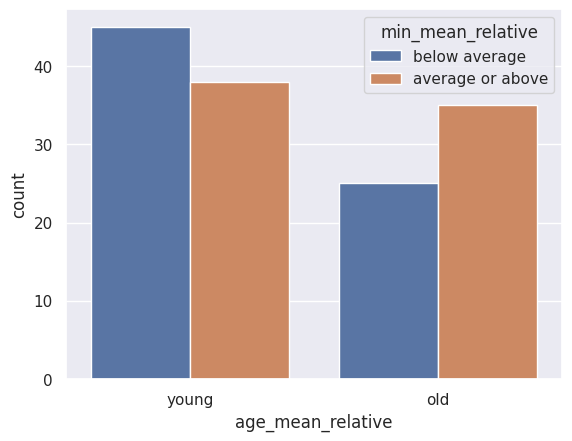

In [ ]:
sns.set_theme()
sns.countplot(x='age_mean_relative', hue='min_mean_relative', data=wnba)
plt.show()         


In [ ]:
print(little_xp)

                       Name Team  Pos  Height  Weight        BMI Birth_Place  \
0             Aerial Powers  DAL    F     183    71.0  21.200991          US   
8              Allisha Gray  DAL    G     185    76.0  22.205990          US   
11            Alyssa Thomas  CON    F     188    84.0  23.766410          US   
12          Amanda Zahui B.   NY    C     196   113.0  29.414827          SE   
13             Amber Harris  CHI    F     196    88.0  22.907122          US   
16              Asia Taylor  WAS    F     185    76.0  22.205990          US   
19          Breanna Stewart  SEA  F/C     193    77.0  20.671696          US   
24            Brittany Boyd   NY    G     175    71.0  23.183673          US   
33             Chelsea Gray   LA    G     180    77.0  23.765432          US   
34          Cheyenne Parker  CHI    F     193    86.0  23.087868          US   
43            Dearica Hamby  SAN    F     191    86.0  23.573915          US   
47       Elizabeth Williams  ATL  F/C   

In [ ]:
def make_pts_ordinal(row):
    if row['PTS'] <= 20:
        return 'very few points'
    if (20 < row['PTS'] <=  80):
        return 'few points'
    if (80 < row['PTS'] <=  150):
        return 'many, but below average'
    if (150 < row['PTS'] <= 300):
        return 'average number of points'
    if (300 < row['PTS'] <=  450):
        return 'more than average'
    else:
        return 'much more than average'
    
wnba['PTS_ordinal_scale'] = wnba.apply(make_pts_ordinal, axis = 1)

print(wnba['PTS_ordinal_scale'].value_counts())

average number of points    45
few points                  27
many, but below average     25
more than average           21
much more than average      13
very few points             12
Name: PTS_ordinal_scale, dtype: int64


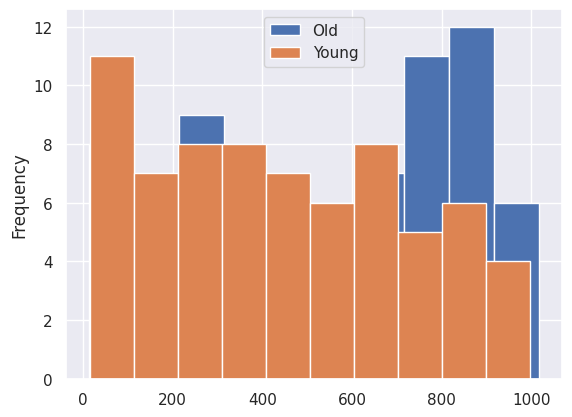

In [141]:
wnba[wnba.Age >= 27]['MIN'].plot.hist(label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.hist(label = 'Young', legend = True)
plt.show()

By using histtype = 'step' we see both shapes clearly even when there is overlap.

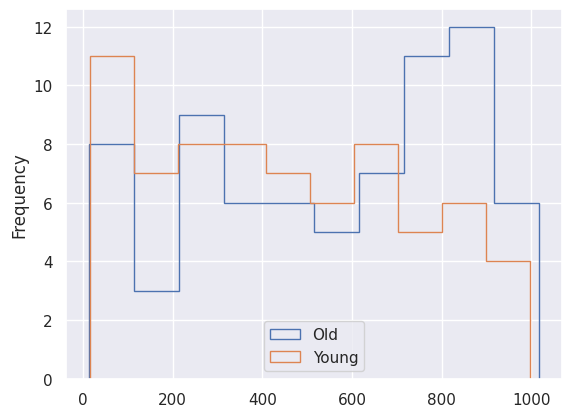

In [142]:
wnba[wnba.Age >= 27]['MIN'].plot.hist(histtype = 'step', label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.hist(histtype = 'step', label = 'Young', legend = True)
plt.show()

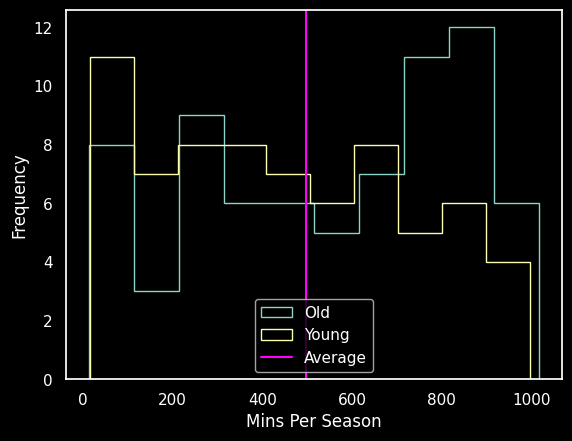

496.97202797202794


In [153]:
style.use('dark_background')
wnba[wnba.Age >= 27]['MIN'].plot.hist(label = 'Old', legend = True, histtype='step')
wnba[wnba.Age < 27]['MIN'].plot.hist(label = 'Young', legend = True, histtype='step')
plt.axvline(wnba['MIN'].mean(), label='Average', color='Magenta')
plt.grid(False)
plt.legend()
plt.xlabel('Mins Per Season')
plt.show()
print(wnba['MIN'].mean())

Using KDE as opposed to HIST smooths out the frequency and scales the output.The advantage of using KDE over HIST is when we want to compare multiple frequencies distributions. It becomes difficult to keep track of more than 2 frequency distribution Histograms buts we can compare multiple KDE simultaneously and clearly on the same chart.

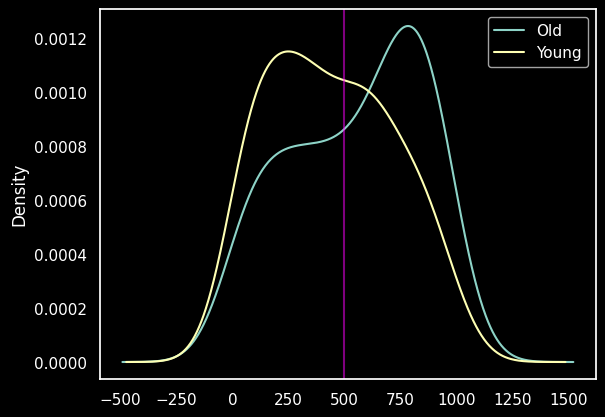

In [158]:
wnba[wnba.Age >= 27]['MIN'].plot.kde(label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.kde(label = 'Young', legend = True)
plt.axvline(wnba['MIN'].mean(), label='Average', color='Magenta', alpha=.5)
plt.grid(False)
plt.show()

KDE stands for Kernal Density Plot. As opposed to a HIST which displays frequencies, KDE displays density values which are proabilities.
KDE's provide a much clearer picture of a frequencies distribution. KDE's are good for up 5 distributions simultaneously after that their readability suffer.

We can clearly see simultaneously all the height distributions for the different positions, who is tallest and average height for each respective position with the KDE visualizations.

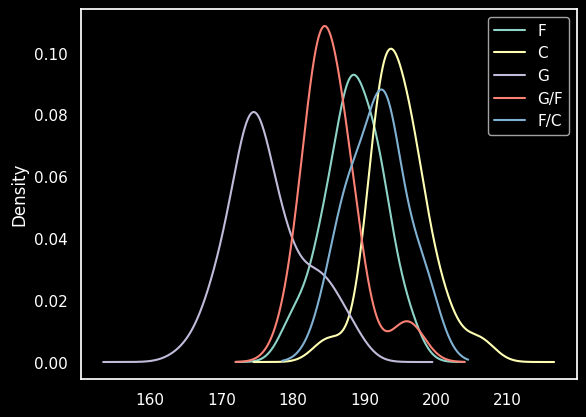

In [160]:
wnba[wnba.Pos == 'F']['Height'].plot.kde(label = 'F', legend = True)
wnba[wnba.Pos == 'C']['Height'].plot.kde(label = 'C', legend = True)
wnba[wnba.Pos == 'G']['Height'].plot.kde(label = 'G', legend = True)
wnba[wnba.Pos == 'G/F']['Height'].plot.kde(label = 'G/F', legend = True)
wnba[wnba.Pos == 'F/C']['Height'].plot.kde(label = 'F/C', legend = True)
plt.grid(False)
plt.show()

Searborn's stripplot is another great way to represent the players Heights for each position. If we set Jitter to true we can see the amount of players per height, with jitter set to false we just see the range (which is exactly what we want to repreent).

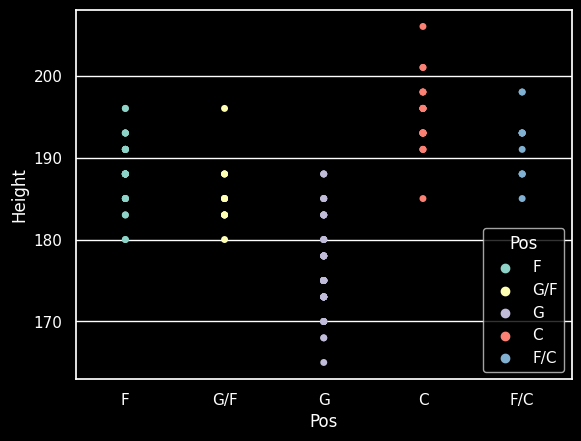

In [165]:
sns.stripplot(x = 'Pos', y = 'Height', hue='Pos', data = wnba, jitter = False)
plt.show()

As expexted weight follows a similar distribution to Height for each position.

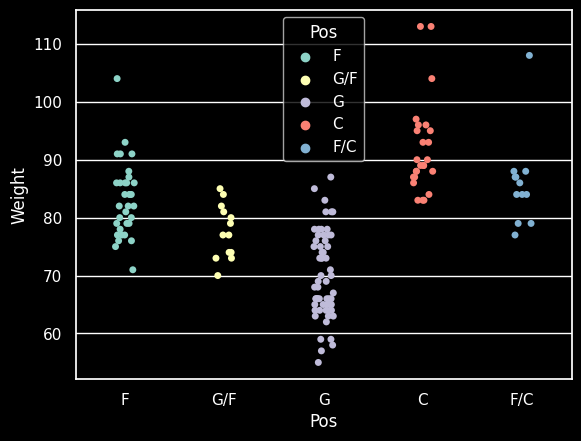

In [168]:
sns.stripplot(x = 'Pos', y = 'Weight', data = wnba, hue='Pos', jitter = True)
plt.show()

The dots on our chart from the boxplot representation represent outliers in the sample, values that are much higher or lower than the 25-75 quartiles. A value is considered an outlier if it is 1.5 times higher the upper quartile or lower quartile.

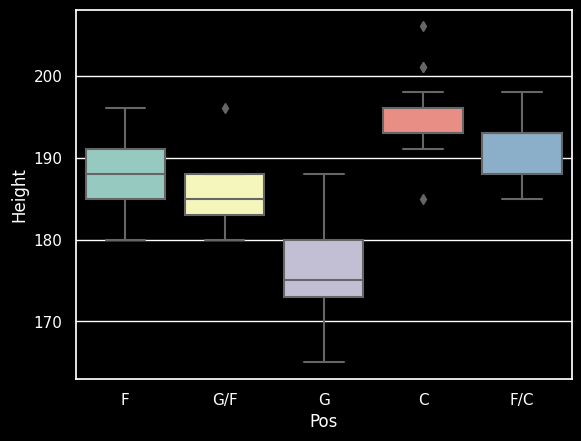

In [169]:
sns.boxplot(x = 'Pos', y = 'Height', data = wnba)
plt.show()

whis lets us tighten or loosen the range in which a variable is considered an outlier.

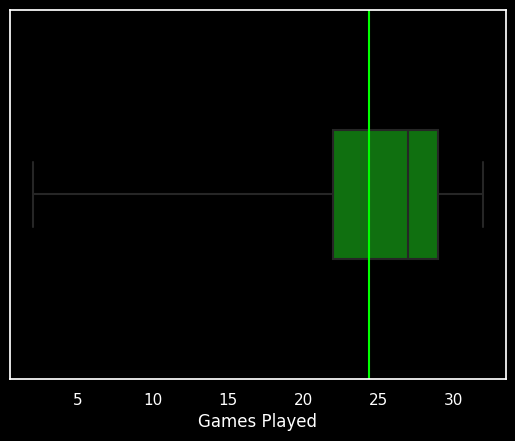

In [204]:

sns.boxplot(x = wnba['Games Played'], whis = 3, width = .35, color='green')
iqr = 7
lower_bound = 22 - (1.5* iqr)
upper_bound = 29 + (1.5* iqr)
plt.axvline(wnba['Games Played'].mean(), color='lime')
plt.grid(False)
plt.show()
outliers_low = sum(wnba['Games Played'] < lower_bound)
outliers_high = sum(wnba['Games Played'] > upper_bound)

In [ ]:

sns.violinplot(x = wnba['Games Played'], whis = 1)